In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf


# Set the random seed
np.random.seed(1337)

In [2]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  "./paintings_450/",
  label_mode = "categorical",
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=1337,
  image_size=(100, 100),
  batch_size=64)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "./paintings_450/",
  label_mode = "categorical",
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=1337,
  image_size=(100, 100),
  batch_size=64)

# Create the test split (10% of the total data, 50% of the validation data)
validation_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((1*validation_batches) // 2)
val_ds = val_ds.skip((1*validation_batches) // 2)



Found 4411 files belonging to 10 classes.
Using 3529 files for training.
Found 4411 files belonging to 10 classes.
Using 882 files for validation.


['Albrecht Durer', 'Alfred Freddy Krupa', 'Claude Monet', 'Giovanni Battista Piranesi', 'Henri Matisse', 'Marc Chagall', 'Pablo Picasso', 'Rembrandt', 'Salvador Dali', 'Vincent van Gogh']


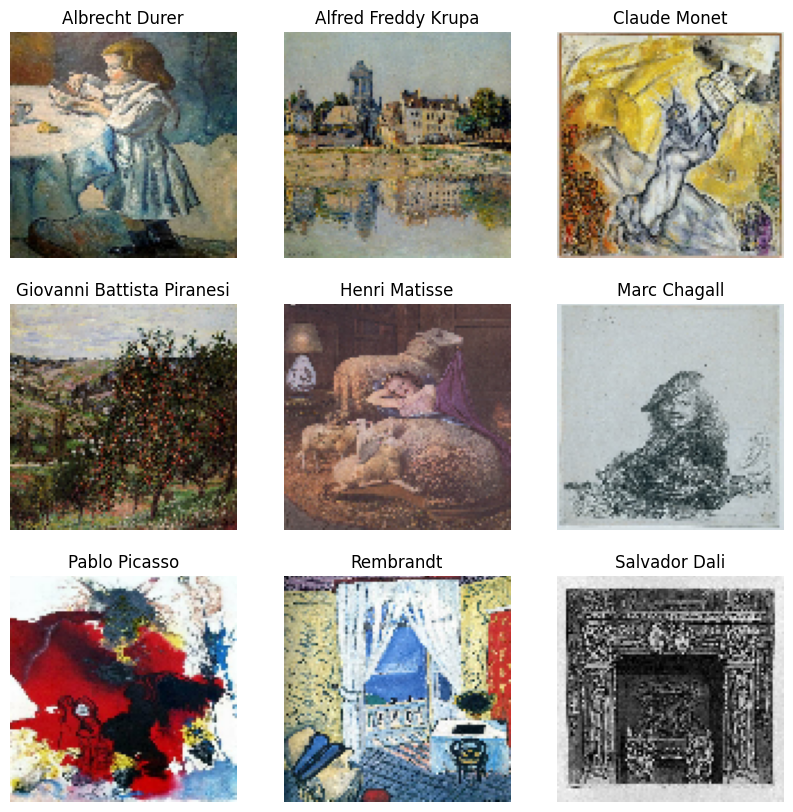

In [3]:
class_names = train_ds.class_names
print(class_names)

# Print samople images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [4]:
from tensorflow.keras import layers

# Implement data augmentation. Used to combat overfitting
image_augmentation = tf.keras.Sequential([
    # Randomly flip the image horizontally and vertically
    layers.RandomFlip("horizontal"),
    
])



In [5]:

# Include this to remove annoying warning logs
tf.get_logger().setLevel('ERROR')

# Create the CNN model
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  image_augmentation,
  tf.keras.layers.Conv2D(64, 3, padding="same", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.L2(0.001), activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.L2(0.001), activation='softmax'),
  
])

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)



Epoch 1/10
56/56 [==============================] - 25s 365ms/step - loss: 2.4350 - accuracy: 0.1578 - val_loss: 2.1777 - val_accuracy: 0.2696
Epoch 2/10
56/56 [==============================] - 21s 332ms/step - loss: 2.1646 - accuracy: 0.2576 - val_loss: 1.9652 - val_accuracy: 0.3733
Epoch 3/10
56/56 [==============================] - 22s 349ms/step - loss: 1.9848 - accuracy: 0.3315 - val_loss: 1.9399 - val_accuracy: 0.3571
Epoch 4/10
56/56 [==============================] - 24s 387ms/step - loss: 1.8541 - accuracy: 0.4044 - val_loss: 1.8027 - val_accuracy: 0.4101
Epoch 5/10
56/56 [==============================] - 21s 339ms/step - loss: 1.7486 - accuracy: 0.4358 - val_loss: 1.7514 - val_accuracy: 0.4309
Epoch 6/10
56/56 [==============================] - 23s 374ms/step - loss: 1.6294 - accuracy: 0.4860 - val_loss: 1.7734 - val_accuracy: 0.4493
Epoch 7/10
56/56 [==============================] - 23s 370ms/step - loss: 1.5574 - accuracy: 0.5152 - val_loss: 1.6442 - val_accuracy: 0.4700

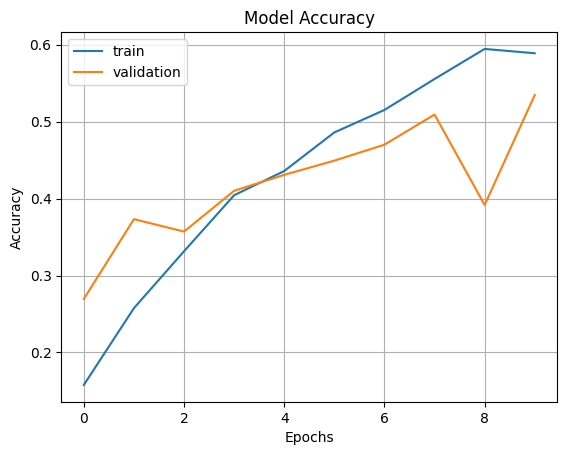

In [6]:
# Plot the model accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()



In [7]:
# Print the test scores
score = model.evaluate(test_ds.take(-1), batch_size=36)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 4s 247ms/step - loss: 1.5667 - accuracy: 0.5290
Test loss: 1.566739797592163
Test accuracy: 0.5290178656578064
